# Circuiti 2

In [1]:
import numpy as np
from iminuit import Minuit
from iminuit.cost import LeastSquares
from scipy.stats import chi2
import matplotlib.pyplot as plt
from uncertainties import ufloat
import uncertainties.umath as uu

### Resistenza generatore di funzioni

In [2]:
R = 267 #resistenza

V_R = 4.189
V = 5

R_gen = (V - V_R)/V_R * R
print(R_gen)

51.69181188827882


### Circuito RC

In [3]:
R = ufloat(67 * 10 ** (3), 67 * 10) #ohm
C = 10 * 10 ** (-9) #farad

#### Carica

In [4]:
freq = 200 #hertz
tens = 5 #volt

In [5]:
data = np.loadtxt("Dati/RC_carica.txt")

t = []
V = []

for i in range(1,len(data)):
    t.append(data[i][0] * 10 ** (-6))
    V.append(data[i][1] * 10 ** (-3))

t = np.array(t)
V = np.array(V)

In [6]:
def model(t, V0, tau, t0): # t0 l'offset
    return V0 * (1 - np.exp(-(t + t0)/tau))

V_err = 0.01 * V

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 5, tau = 0.001, t0 = 0)

m.fixed["V0"] = (5)
m.migrad()
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau1 = m.values["tau"]
tau1_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.159 (χ²/ndof = 0.1)      │              Nfcn = 149              │
│ EDM = 3.81e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │   5.019   │   0.034   │            │            │         │         │       │
│ 1 │ tau  │ 0.648e-3  │ 0.012e-3  │            │            │         │         │       │
│ 2 │ t0   │  13.6e-6  │  3.3e-6   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬───────────────────────────────┐
│     │        V0       tau        t0 │
├─────┼───────────────────────────────┤
│  V0 │   0.00112 355.35e-9 60.551e-9 │
│ tau │ 355.35e-9  1.48e-10  0.033e-9 │
│  t0 │ 60.551e-9  0.033e-9  1.07e-11 │
└─────┴───────────────────────────────┘

p value: 0.9999678363000636


[-0.04720712  0.09634802  0.16607881 -0.23609833  0.10059139 -0.55797664
  0.12619637  0.63224626 -0.14816127 -0.01944082  0.09620833 -0.49134661
  0.2179155   0.08323836 -0.00907522]


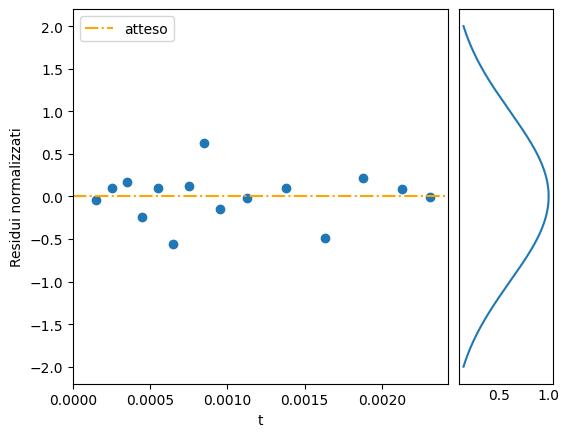

In [7]:
def mostra_residui(t, V, Verr, model, V0, tau, t0):
    residuals = (V - model(t,V0,tau,t0))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(0, max(t) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-2, 2, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(t, V, V_err, model, m.values["V0"], m.values["tau"], m.values["t0"])

#### Scarica

In [8]:
data = np.loadtxt("Dati/RC_scarica.txt")

t = []
V = []

for i in range(len(data)):
    t.append(data[i][0])
    V.append(data[i][1])

t = np.array(t)
V = np.array(V)

In [9]:
def model(t, V0, tau, t0, q): # t0 l'offset
    return V0 * np.exp(-(t + t0)/tau) + q

V_err = 0.03 * V

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 5, tau = 0.001, t0 = 0, q=0)

m.fixed["V0"] = (5)
m.migrad()
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau2 = m.values["tau"]
tau2_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))
print(m.valid)

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 16.83 (χ²/ndof = 1.7)      │              Nfcn = 226              │
│ EDM = 2.47e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │    5.0    │    0.4    │            │            │         │         │       │
│ 1 │ tau  │ 0.671e-3  │ 0.012e-3  │            │            │         │         │       │
│ 2 │ t0   │ -2.48e-3  │  0.06e-3  │            │            │         │         │       │
│ 3 │ q    │  -0.063   │   0.010   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────┐
│     │         V0        tau         t0          q │
├─────┼─────────────────────────────────────────────┤
│  V0 │      0.178 -447.53e-9 23.3761e-6    0.27e-3 │
│ tau │ -447.53e-9   1.45e-10    0.06e-9 -112.62e-9 │
│  t0 │ 23.3761e-6    0.06e-9   3.21e-09   -35.3e-9 │
│   q │    0.27e-3 -112.62e-9   -35.3e-9   0.000104 │
└─────┴─────────────────────────────────────────────┘

p value: 0.07815844569965424
True


[ 0.77932923  0.56279478 -0.25602989 -0.65052795 -1.0625835  -0.74059383
 -0.50710174  3.54863076 -0.31281505 -0.5813845   0.15356828 -0.10844069
 -0.59058356  0.26826664]


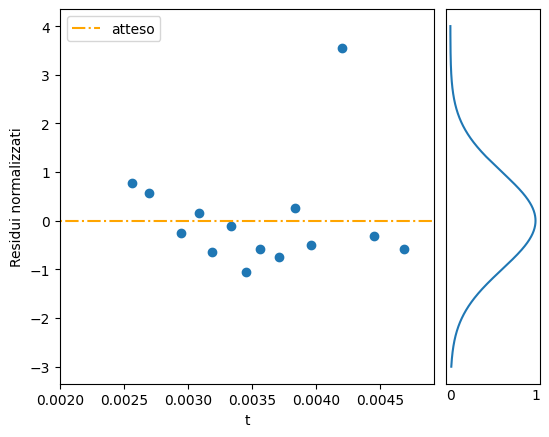

In [10]:
def mostra_residui(t, V, Verr, model, V0, tau, t0,q):
    residuals = (V - model(t,V0,tau,t0,q))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(0.002, max(t) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-3, 4, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(t, V, V_err, model, m.values["V0"], m.values["tau"], m.values["t0"],m.values["q"])

#### Studio tau

In [11]:
t = (tau1 - tau2) / np.sqrt(tau1_err ** 2 + tau2_err ** 2)
print(t)

-1.3573755796856135


In [12]:
C1 = ufloat(tau1, tau1_err) / R
C2 = ufloat(tau2, tau2_err) / R
print(C1, C2)

C = (C1 + C2)/2
print(C)

(9.67+/-0.21)e-09 (1.001+/-0.021)e-08
(9.84+/-0.16)e-09


#### Circuito RL

In [13]:
R = ufloat(466.3, 466.3 * 0.01)  #ohm

#### Carica

In [14]:
data = np.loadtxt("Dati/RL_carica.txt")

t = []
V = []

for i in range(len(data)):
    t.append(data[i][0] * 10 ** (-6))
    V.append(data[i][1])

t = np.array(t)
V = np.array(V)

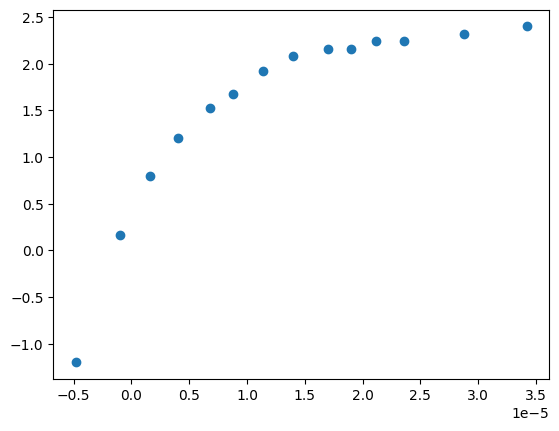

In [15]:
fig,ax = plt.subplots(1,1)
plt.scatter(t,V)
plt.show()

In [16]:
def model(t, V0, tau, t0, q): # t0 l'offset
    return V0 * (1 - np.exp(-(t + t0)/tau)) + q

V_err = 0.012 * V

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 5, tau = 0.001, t0 = 0, q = 0)

m.fixed["V0"] = (5)
m.fixed["q"] = (-2.5)
m.migrad()
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau1 = m.values["tau"]
tau1_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 23.13 (χ²/ndof = 2.3)      │              Nfcn = 292              │
│ EDM = 4.33e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │   2.581   │   0.026   │            │            │         │         │       │
│ 1 │ tau  │  7.92e-6  │  0.08e-6  │            │            │         │         │       │
│ 2 │ t0   │  2.22e-6  │  0.07e-6  │            │            │         │         │       │
│ 3 │ q    │  -0.209   │   0.024   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────┐
│     │           V0          tau           t0            q │
├─────┼─────────────────────────────────────────────────────┤
│  V0 │     0.000693  665.221e-12  1.686170e-9      -0.5e-3 │
│ tau │  665.221e-12     6.04e-15        0e-15   93.519e-12 │
│  t0 │  1.686170e-9        0e-15     5.24e-15 -1.688554e-9 │
│   q │      -0.5e-3   93.519e-12 -1.688554e-9     0.000555 │
└─────┴─────────────────────────────────────────────────────┘

p value: 0.010262285242678804


[-0.08138534 -0.24251032  2.15606038  0.30302563 -1.42114271 -2.4924726
  0.44234408  1.63774883  0.61525338 -1.34654317  0.08059219 -1.22342022
 -0.01996871  1.87694384]


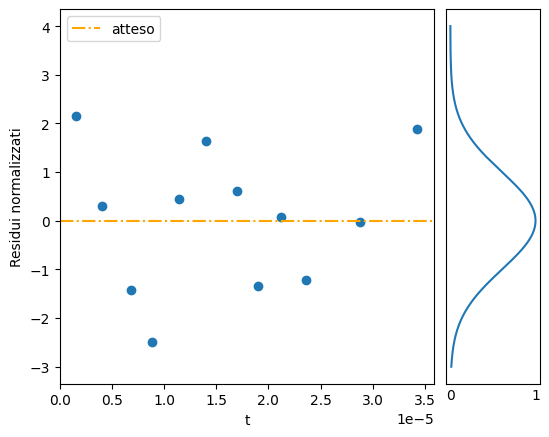

In [17]:
def mostra_residui(t, V, Verr, model, V0, tau, t0, q):
    residuals = (V - model(t,V0,tau,t0,q))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(0, max(t) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-3, 4, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(t, V, V_err, model, m.values["V0"], m.values["tau"], m.values["t0"], m.values["q"])

#### Scarica

In [18]:
data = np.loadtxt("Dati/RL_scarica.txt")

t = []
V = []

for i in range(len(data)):
    t.append(data[i][0] * 10 ** (-5))
    V.append(data[i][1])

t = np.array(t)
V = np.array(V)

In [19]:
def model(t, V0, tau, t0, q): # t0 l'offset
    return V0 * np.exp(-(t + t0)/tau) + q

V_err = 0.05 * V

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 5, tau = 0.001, t0 = 0, q = 0)

m.fixed["V0"] = (5)
m.fixed["q"] = (-2.5)
m.migrad()
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau2 = m.values["tau"]
tau2_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 12.89 (χ²/ndof = 1.4)      │              Nfcn = 453              │
│ EDM = 2.56e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │    10     │    11     │            │            │         │         │       │
│ 1 │ tau  │  8.61e-6  │  0.34e-6  │            │            │         │         │       │
│ 2 │ t0   │  -30e-6   │   10e-6   │            │            │         │         │       │
│ 3 │ q    │   -2.44   │   0.05    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────┐
│     │            V0           tau            t0             q │
├─────┼─────────────────────────────────────────────────────────┤
│  V0 │           123 -457.15032e-9  110.37664e-6        0.0415 │
│ tau │ -457.15032e-9      1.16e-13     -0.30e-12  -12.30244e-9 │
│  t0 │  110.37664e-6     -0.30e-12      9.92e-11      29.64e-9 │
│   q │        0.0415  -12.30244e-9      29.64e-9       0.00254 │
└─────┴─────────────────────────────────────────────────────────┘

p value: 0.16746796980928114


[-1.88684839  0.39228677  2.74112907  1.00017953 -0.02527045 -0.11335068
 -0.37357041 -0.05211769 -0.53703694 -0.16704459 -0.42590771  0.10893576
 -0.01715359]


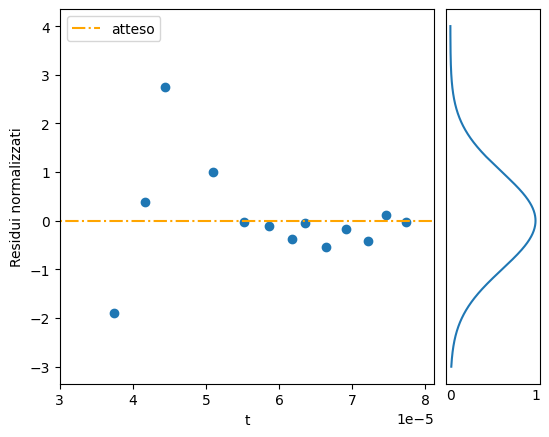

In [20]:
def mostra_residui(t, V, Verr, model, V0, tau, t0, q):
    residuals = (V - model(t,V0,tau,t0,q))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(3 * 10 ** (-5), max(t) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-3, 4, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(t, V, V_err, model, m.values["V0"], m.values["tau"], m.values["t0"], m.values["q"])

In [21]:
t = np.delete(t,(0,2))
V = np.delete(V,(0,2))

In [22]:
def model(t, V0, tau, t0, q): # t0 l'offset
    return V0 * np.exp(-(t + t0)/tau) + q

V_err = 0.04 * V

minimi_quadrati = LeastSquares(t, V, V_err, model)

m = Minuit(minimi_quadrati, V0 = 5, tau = 0.001, t0 = 0, q = 0)

m.fixed["V0"] = (5)
m.fixed["q"] = (-2.5)
m.migrad()
m.fixed = False
m.migrad()
m.hesse()
display(m)

tau2 = m.values["tau"]
tau2_err = m.errors["tau"]

def func(x):
    return chi2.cdf(x,m.ndof)

pvalue = func(np.inf) - func(m.fval)
print("p value: " + str(pvalue))

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 1.451 (χ²/ndof = 0.2)      │              Nfcn = 563              │
│ EDM = 3.16e-05 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │     Covariance FORCED pos. def.      │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ V0   │   62.7    │    1.1    │            │            │         │         │       │
│ 1 │ tau  │  7.86e-6  │  0.04e-6  │            │            │         │         │       │
│ 2 │ t0   │ -16.17e-6 │  0.13e-6  │            │            │         │         │       │
│ 3 │ q    │  -2.385   │   0.025   │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌─────┬─────────────────────────────────────────────────────────────┐
│     │             V0            tau             t0              q │
├─────┼─────────────────────────────────────────────────────────────┤
│  V0 │           1.13 -19.2352566e-9   65.584380e-9        -4.5e-3 │
│ tau │ -19.2352566e-9       1.77e-15        2.4e-15  -278.6461e-12 │
│  t0 │   65.584380e-9        2.4e-15       1.78e-14    558.489e-12 │
│   q │        -4.5e-3  -278.6461e-12    558.489e-12       0.000633 │
└─────┴─────────────────────────────────────────────────────────────┘

p value: 0.9839414705563726


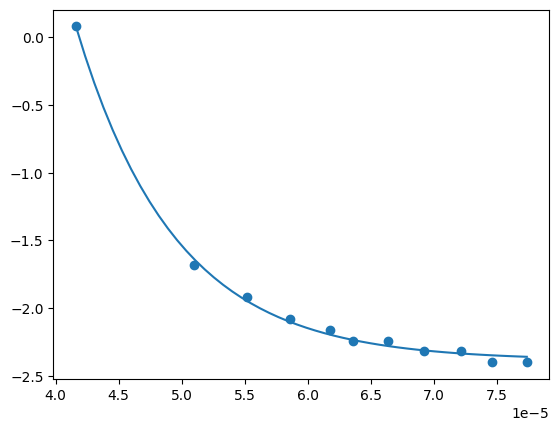

In [23]:
fig,ax = plt.subplots(1,1)
plt.scatter(t,V)
x = np.linspace(min(t),max(t))
y = model(x, m.values["V0"], m.values["tau"], m.values["t0"], m.values["q"])
plt.plot(x,y)
plt.show()

[-0.00216898  0.6018122  -0.36711732 -0.26015666 -0.42215416  0.05466334
 -0.44740074  0.09060344 -0.16111697  0.53981087  0.42417606]


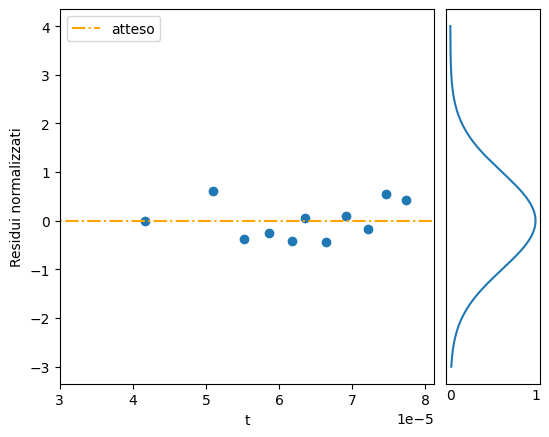

In [24]:
def mostra_residui(t, V, Verr, model, V0, tau, t0, q):
    residuals = (V - model(t,V0,tau,t0,q))/Verr

    fig = plt.figure(figsize=(6, 6))

    gs = fig.add_gridspec(2, 2,  width_ratios=(4, 1), height_ratios=(1, 4),
                        left=0.1, right=0.9, bottom=0.1, top=0.9,
                        wspace=0.05, hspace=0.05)

    ax = fig.add_subplot(gs[1, 0])
    ax_ploty = fig.add_subplot(gs[1, 1], sharey=ax)

    # weigthed mean of residuals

    ax.scatter(t, residuals)
    ax.hlines(0,0,len(V),color='orange',linestyle='-.',label='atteso')
    ax.set_xlabel("t")
    ax.set_xlim(3 * 10 ** (-5), max(t) * 1.05)
    ax.set_ylabel("Residui normalizzati")
    ax.legend(loc='upper left')
    ax.plot()

    x = np.linspace(-3, 4, 1000)
    ax_ploty.plot(np.exp(-0.5*(x)**2), x)
    ax_ploty.tick_params(labelleft=False, length=0)

    print(residuals)

mostra_residui(t, V, V_err, model, m.values["V0"], m.values["tau"], m.values["t0"], m.values["q"])

#### Studio tau

In [25]:
t = (tau1 - tau2) / np.sqrt(tau1_err ** 2 + tau2_err ** 2)
print(t)

0.6697874598441113


In [26]:
L1 = ufloat(tau1, tau1_err) * R
L2 = ufloat(tau2, tau2_err) * R
print(L1, L2)

L = (L1 + L2) / 2
print(L)

0.00369+/-0.00005 0.00367+/-0.00004
0.00368+/-0.00004


## Circuito RLC

Valore di R sotto il quale c'è sottosmorzamento e sopra il quale c'è sovrasmorzamento

In [27]:
print(2 * uu.sqrt(L/C))

1223+/-12
